In [46]:
import timeit
import random
import matplotlib.pyplot as plt
import numpy as np

In [47]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = 0
        j = 0
        k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
    
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
    
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
        

In [48]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
        

In [49]:
input_sizes = list(range(2, 101))
merge_sort_times = []
insertion_sort_times = []

for size in input_sizes:
    arr = [random.randint(0, 1000) for _ in range(size)]

    # Run merge sort 100 times and take average
    merge_time = timeit.timeit(lambda: [merge_sort(arr.copy()) for _ in range(100)], number=1) / 100
    merge_sort_times.append(merge_time)

    # Run insertion sort 100 times and take average
    insert_time = timeit.timeit(lambda: [insertion_sort(arr.copy()) for _ in range(100)], number=1) / 100
    insertion_sort_times.append(insert_time)
    

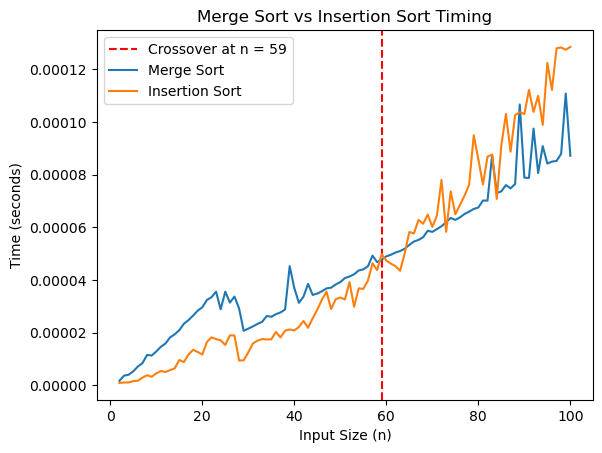

In [50]:
for i in range(len(input_sizes)):
    if merge_sort_times[i] < insertion_sort_times[i]:
        crossover_n = input_sizes[i]
        crossover_time = merge_sort_times[i]
        plt.axvline(x=crossover_n, color='red', linestyle='--', label=f'Crossover at n = {crossover_n}')
        break
        
plt.plot(input_sizes, merge_sort_times, label='Merge Sort')
plt.plot(input_sizes, insertion_sort_times, label='Insertion Sort')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Merge Sort vs Insertion Sort Timing')
plt.legend()
plt.show()